<a href="https://colab.research.google.com/github/Rohithtechis/Sucide_pred/blob/main/Sucide_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [ ]:
df = pd.read_csv('/content/Sucide.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [ ]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


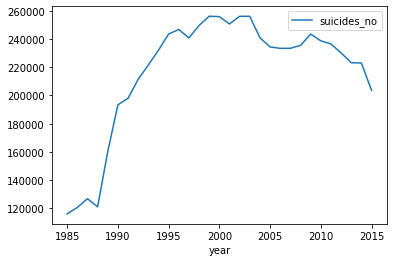

In [ ]:
a = df.groupby(by='year').sum().reset_index()
a.loc[a['year'] < 2016].plot(x='year',y='suicides_no')

In [ ]:
df.groupby(by="age")['suicides_no'].sum().sort_values()

age
5-14 years       52264
75+ years       653118
15-24 years     808542
25-34 years    1123912
55-74 years    1658443
35-54 years    2452141
Name: suicides_no, dtype: int64

In [ ]:
df.groupby(by="generation")['suicides_no'].sum().sort_values()

generation
Generation Z         15906
G.I. Generation     510009
Millenials          623459
Generation X       1532804
Silent             1781744
Boomers            2284498
Name: suicides_no, dtype: int64

In [ ]:
corr = df.corr()
corr

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


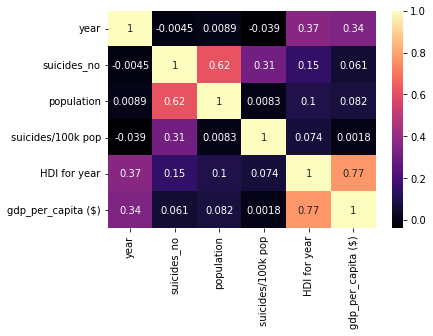

In [ ]:
sns.heatmap(data=df.corr(),annot=True,cmap='magma');

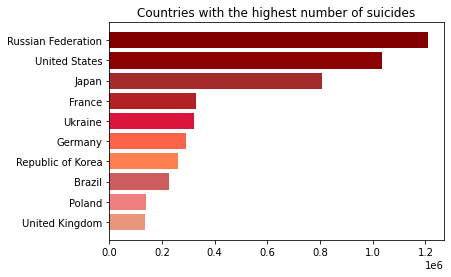

In [ ]:
a = df.groupby(by='country').sum().reset_index().sort_values(by='suicides_no',ascending=True).tail(10)
plt.barh(a.country,a.suicides_no,color=['#E9967A','#F08080','#CD5C5C','#FF7F50','#FF6347','#DC143C','#B22222','#A52A2A','#8B0000','#800000'])
plt.title('Countries with the highest number of suicides');

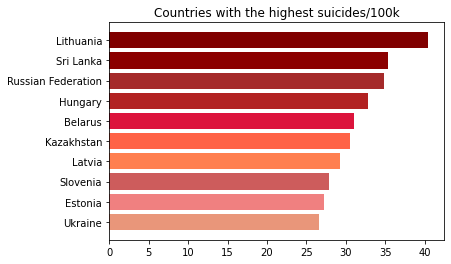

In [ ]:
a = df.groupby(by='country').mean().reset_index().sort_values(by='suicides/100k pop',ascending=True)[['suicides/100k pop','country']].tail(10)
plt.barh(a.country,a["suicides/100k pop"],color=['#E9967A','#F08080','#CD5C5C','#FF7F50','#FF6347','#DC143C','#B22222','#A52A2A','#8B0000','#800000'])
plt.title('Countries with the highest suicides/100k');

In [ ]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [ ]:
df.drop(['country-year','HDI for year','suicides/100k pop'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             27820 non-null  object
 1   year                27820 non-null  int64 
 2   sex                 27820 non-null  object
 3   age                 27820 non-null  object
 4   suicides_no         27820 non-null  int64 
 5   population          27820 non-null  int64 
 6    gdp_for_year ($)   27820 non-null  object
 7   gdp_per_capita ($)  27820 non-null  int64 
 8   generation          27820 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.9+ MB


In [ ]:
df['age'].value_counts()

55-74 years    4642
35-54 years    4642
25-34 years    4642
15-24 years    4642
75+ years      4642
5-14 years     4610
Name: age, dtype: int64

In [ ]:
df[' gdp_for_year ($) '].value_counts()

2,690,222,283,968    12
22,583,157,895       12
12,138,486,532       12
281,358,175,896      12
1,601,094,756,210    12
                     ..
20,153,871,681       10
152,451,923,077      10
10,546,135,160       10
411,755,164,833      10
187,805,922,349      10
Name:  gdp_for_year ($) , Length: 2321, dtype: int64

In [ ]:
df.dtypes

country               object
year                   int64
sex                   object
age                   object
suicides_no            int64
population             int64
 gdp_for_year ($)     object
gdp_per_capita ($)     int64
generation            object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
df['sex']=en.fit_transform(df['sex'])
df['age']=en.fit_transform(df['age'])
df['country']=en.fit_transform(df['country'])
df['genration']=en.fit_transform(df['generation'])

In [ ]:
df[' gdp_for_year ($) '].replace(',','',regex=True,inplace=True)

In [ ]:
df[' gdp_for_year ($) ']=df[' gdp_for_year ($) '].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   country             27820 non-null  int64
 1   year                27820 non-null  int64
 2   sex                 27820 non-null  int64
 3   age                 27820 non-null  int64
 4   suicides_no         27820 non-null  int64
 5   population          27820 non-null  int64
 6    gdp_for_year ($)   27820 non-null  int64
 7   gdp_per_capita ($)  27820 non-null  int64
 8   generation          27820 non-null  int64
dtypes: int64(9)
memory usage: 1.9 MB


In [ ]:
df.head()

,country,year,sex,age,suicides_no,population,gdp_for_year ($),gdp_per_capita ($),generation
0,0,1987,1,0,21,312900,2156624900,796,2
1,0,1987,1,2,16,308000,2156624900,796,5
2,0,1987,0,0,14,289700,2156624900,796,2
3,0,1987,1,5,1,21800,2156624900,796,1
4,0,1987,1,1,9,274300,2156624900,796,0


In [ ]:
X = df.drop('suicides_no' ,axis=1)
y = df['suicides_no']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22256, 8)
(22256,)
(5564, 8)
(5564,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,pred))
print(f'root mean squared error {rmse}')
print("Accuracy: ", model.score(X_test,y_test))
print('r2_score',r2_score(y_test,pred))

root mean squared error 88.28639051049124
Accuracy:  0.990441116158486
r2_score 0.990441116158486


In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model,X,y,cv=5))

[-11.43538526   0.37877095   0.52496877   0.21450835  -0.88069168]


In [ ]:
accuracies = cross_val_score(estimator = model,X = X_train,y = y_train,cv=10)
print("Accuracy(mean):%",accuracies.mean()*100)

Accuracy(mean):% 97.5162262446035


In [ ]:
compair = pd.DataFrame({'y_test':y_test,'pred':pred})
compair

,y_test,pred
8548,58,60.70
675,227,245.90
18545,8,17.03
9309,495,483.81
4174,1011,1418.43
...,...,...
16546,10,4.29
14851,0,1.28
6989,0,0.41
16664,582,660.76


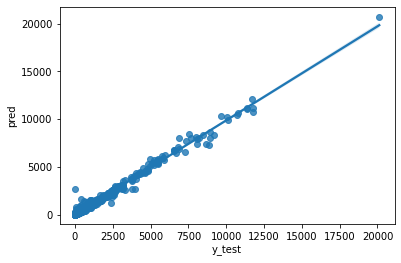

In [ ]:
sns.regplot(x='y_test',y='pred',data=compair)

In [ ]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'root mean squared error {rmse}')
print("Accuracy: ", lm.score(X_test,y_test))
print('r2_score',r2_score(y_test,y_pred))

root mean squared error 654.588264493213
Accuracy:  0.4745201212703053
r2_score 0.4745201212703053


In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lm,X,y,cv=10))

[-0.33583148 -3.82537355 -1.5675246   0.61891628  0.52836325 -3.19340083
 -1.29485332  0.2211041  -1.02367017  0.4639886 ]


In [ ]:
accuracies = cross_val_score(estimator = lm,X = X_train,y = y_train,cv=10)
print("Accuracy(mean):%",accuracies.mean()*100)

Accuracy(mean):% 39.003479809953085


In [ ]:
compair = pd.DataFrame({'y_test':y_test,'pred':y_pred})
compair

,y_test,pred
8548,58,128.546984
675,227,420.724465
18545,8,-79.393723
9309,495,560.783817
4174,1011,1806.310499
...,...,...
16546,10,-211.171541
14851,0,-152.240229
6989,0,134.054139
16664,582,1495.220853


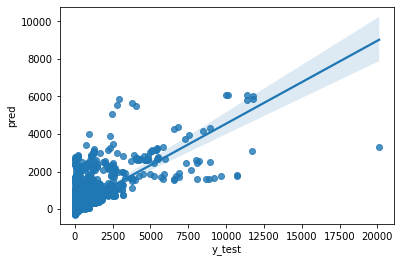

In [ ]:
sns.regplot(x='y_test',y='pred',data=compair)